In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


***2. Data Partitioning***

In [ ]:

import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import svm
from scipy import io

**(a)MNIST**
1. reshape training data for reducing dimensionality
2. shuffle training data's index
3. split training set after shuffled training index
4. split training label after shuffled training index

In [ ]:
from pandas.core.series import reshape
mnist = np.load('/content/gdrive/MyDrive/hw1/data/mnist-data.npz')
mnist_train = mnist["training_data"].reshape((60000, 28 * 28))  # reshape training data
mnist_shuffle = np.random.permutation(mnist["training_data"].shape[0]) # shuffle training index
mnist_training, mnist_val = mnist_train[mnist_shuffle][:50000], mnist_train[mnist_shuffle][50000:] # split training set after shuffle
mnist_labling, mnist_label_val = mnist['training_labels'][mnist_shuffle][:50000], mnist['training_labels'][mnist_shuffle][50000:] # split training label after shuffle

**(b)Spam**
1. shuffle training data's index
2. round training and validation set sizes to integer number
3. split training set after shuffled training index
4. split training label after shuffled training index

In [ ]:
np.random.seed(1)
spam = np.load('/content/gdrive/MyDrive/hw1/data/spam-data.npz')
spam_shuffle = np.random.permutation(spam["training_data"].shape[0]) # shuffle training index
spam_trainsize = round(spam["training_data"].shape[0]*(1-0.2))
spam_training, spam_val = spam["training_data"][:spam_trainsize], spam["training_data"][spam_trainsize:] # split training set after shuffle
spam_labling, spam_label_val = spam['training_labels'][spam_shuffle][:spam_trainsize], spam['training_labels'][spam_shuffle][spam_trainsize:] # split training label after shuffle

**(c)Cifar10**
1. shuffle training data's index
2. round training and validation set sizes to integer number
3. split training set after shuffled training index
4. split training label after shuffled training index

In [ ]:
cifar = np.load('/content/gdrive/MyDrive/hw1/data/cifar10-data.npz')
cifar_train = cifar["training_data"]
cifar_shuffle = np.random.permutation(cifar["training_data"].shape[0]) # shuffle training index
cifar_size = cifar["training_data"].shape[0]- 5000
cifar_training, cifar_val = cifar_train[cifar_shuffle][:cifar_size], cifar_train[cifar_shuffle][cifar_size:] # split training set after shuffle
cifar_labling, cifar_label_val = cifar['training_labels'][cifar_shuffle][:cifar_size], cifar['training_labels'][cifar_shuffle][cifar_size:] # split training label after shuffle

***3. Support Vector Machines: Coding***

In [ ]:
# Define a SVM model for calculating the training and validation accuracy
def model_acc(X_train, X_val, y_train, y_val,num):
  model = svm.SVC(kernel='linear')
  model.fit(X_train[:num],y_train[:num])
  predict_val = model.predict(X_val)
  train_acc = accuracy_score(y_train[:num],model.predict(X_train[:num]))
  val_acc = accuracy_score(y_val,predict_val)
  return train_acc, val_acc


In [ ]:
# Function for record the training and validation accuracy history.
def acc_his(X_train, X_val, y_train, y_val,train_num):
  train_his = []
  val_his = []
  for i in train_num:
    train_acc, val_acc = model_acc(X_train, X_val, y_train, y_val,i)
    train_his.append(train_acc)
    val_his.append(val_acc)
  return train_his,val_his


In [ ]:
# Function for making the plot
def make_plot(train_his,val_his,data_name, train_num):
  plt.figure(figsize=[8,6])
  plt.plot( train_num,train_his,'r',linewidth=3.0)
  plt.plot( train_num,val_his,'b',linewidth=3.0)
  plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
  plt.xlabel('Number of Training Examples  ',fontsize=16)
  plt.ylabel('Accuracy',fontsize=16)
  plt.title(data_name,fontsize=16)

**(a)MNIST**

Data preprocessing to standard unit
Training examples: 100, 200, 500, 1,000, 2,000, 5,000, 10,000

In [ ]:
mnist_training_su,mnist_val_su = (mnist_training -np.mean(mnist_training))/np.std(mnist_training), (mnist_val -np.mean(mnist_val))/np.std(mnist_val)
mnist_train_num = [100, 200, 500, 1000, 2000, 5000,10000]
mnist_train_his,mnist_val_his = acc_his(mnist_training_su, mnist_val_su, mnist_labling, mnist_label_val,mnist_train_num)
mnist_train_his,mnist_val_his

([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0.7733, 0.8331, 0.867, 0.8866, 0.903, 0.9081, 0.9152])

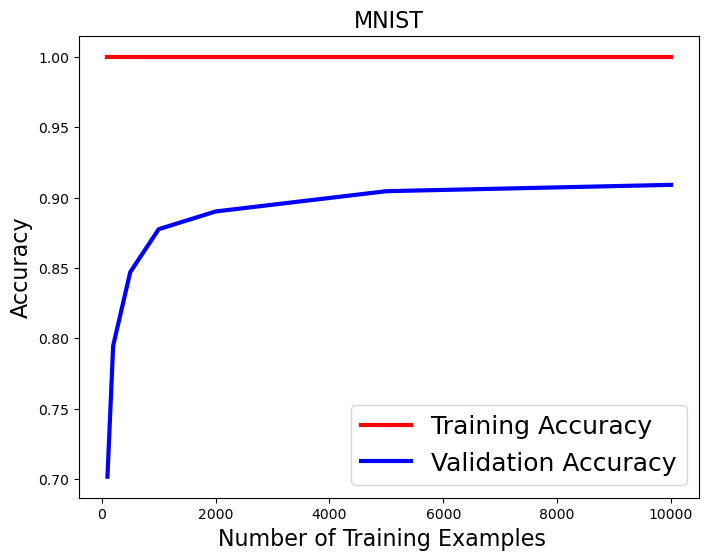

In [ ]:
make_plot(mnist_train_his,mnist_val_his,'MNIST', mnist_train_num)

**(b) Spam**

In [ ]:
spam_train_num = [100, 200, 500, 1000, 2000,4172]
spam_train_his,spam_val_his = acc_his(spam_training, spam_val, spam_labling, spam_label_val,spam_train_num)
spam_train_his,spam_val_his

([0.73, 0.69, 0.688, 0.699, 0.7025, 0.7139005392450569],
 [0.6103117505995204,
  0.6378896882494005,
  0.6918465227817746,
  0.6918465227817746,
  0.6906474820143885,
  0.6906474820143885])

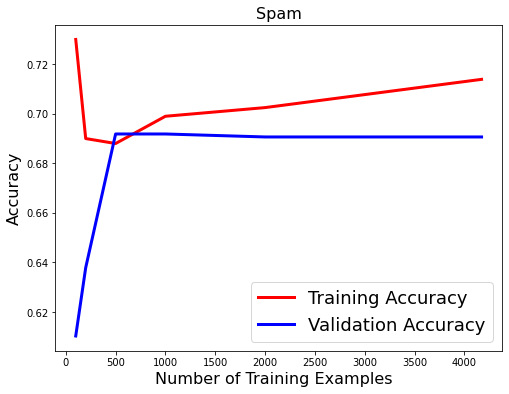

In [ ]:
make_plot(spam_train_his,spam_val_his,'Spam', spam_train_num)

**(c) Cifar10**

In [ ]:
cifar_train_num = [100, 200, 500, 1000, 2000, 5000]
cifar_train_his,cifar_val_his = acc_his(cifar_training, cifar_val, cifar_labling, cifar_label_val,cifar_train_num)
cifar_train_his,cifar_val_his

([1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0.246, 0.2746, 0.2904, 0.2966, 0.3128, 0.2958])

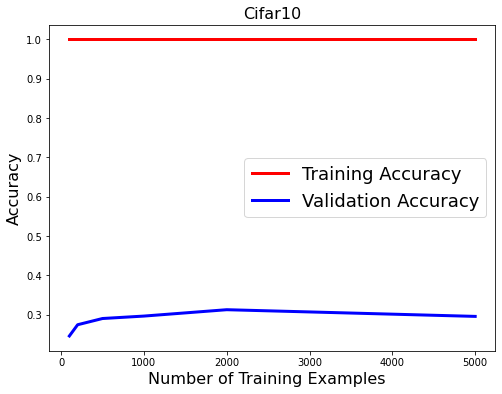

In [ ]:
make_plot(cifar_train_his,cifar_val_his,'Cifar10', cifar_train_num)

***4. Hyperparameter Tuning***

1. Function for SVM model to calculating the accuracy for one C value
2. Function for tuning list of C values and record the accuracy result for each corresponding C value, then print the C value which have best validation accuracy result.

In [ ]:
def model_c(X_train, X_val, y_train, y_val,num,c_score,ker):
  model = svm.SVC(kernel=ker, C = c_score)
  model.fit(X_train[:num],y_train[:num])
  predict_val = model.predict(X_val)
  return accuracy_score(y_val,predict_val)

def hyper_tuning(X_train, X_val, y_train, y_val,num,c_values,ker):
  val_acc = []
  score = dict()
  for c in c_values:
    model_acc =  model_c(X_train, X_val, y_train, y_val,num,c,ker)
    val_acc.append(model_acc)
    score[c] = model_acc # return c with corresponding validation accuracy
  for  k, v in score.items():
    print('c_value :' ,k , ' validation accuracy : ', v)

  print('Best C_value : ',c_values[val_acc.index(max(val_acc))],'validation accuracy :', max(val_acc))
  return c_values[val_acc.index(max(val_acc))],max(val_acc)


In [ ]:
c_values = [0.001, 0.01, 0.1, 0.5,0.7,1,  5, 10, 100]
hyper_tuning(mnist_training_su, mnist_val_su, mnist_labling, mnist_label_val,10000, c_values,'linear')


c_value : 0.001  validation accuracy :  0.9277
c_value : 0.01  validation accuracy :  0.9311
c_value : 0.1  validation accuracy :  0.9177
c_value : 0.5  validation accuracy :  0.9152
c_value : 0.7  validation accuracy :  0.9152
c_value : 1  validation accuracy :  0.9152
c_value : 5  validation accuracy :  0.9152
c_value : 10  validation accuracy :  0.9152
c_value : 100  validation accuracy :  0.9152
Best C_value :  0.01 validation accuracy : 0.9311


(0.01, 0.9311)

***5. K-Fold Cross-Validation***

1. Function for make traning set to k fold
2. Function for cross validation to get best C value

In [ ]:
def folding(data, k=5):
  index = np.random.permutation(data.shape[0])
  f = spam_training.shape[0]// 5
  val1,val2,val3 = data[index][:f],data[index][f:f*2],data[index][f*2:f*3]
  val4,val5 = data[index][f*3:f*4],data[index][f*4:]

  t1, t5 = data[index][f:],data[index][:f*4]
  t2 = np.concatenate((data[index][:f],data[index][f*2:]))
  t3 = np.concatenate((data[index][:f*2],data[index][f*3:]))
  t4 = np.concatenate((data[index][:f*3],data[index][f*4:]))

  return [[t1,val1],[t2,val2],[t3,val3],[t4,val4],[t5,val5]]

train_sets =folding(spam["training_data"], k=5)
label_sets =folding(spam["training_labels"], k=5)

In [ ]:
def cross_validation(datasets, labels,k,num, c_values,ker):
  val_acc = []
  score = dict()
  for i in range(k):
    X_train, X_val = datasets[i][0],datasets[i][1]
    y_train, y_val = labels[i][0],labels[i][1]
    fold_results =hyper_tuning(X_train, X_val, y_train, y_val,num,c_values,ker)
    val_acc.append(fold_results)
  res1 = list(map(max, zip(*val_acc)))
  print ("The Best C_value in 5-fold CV [C_value, Accuracy] : " + str(res1))


In [ ]:
c_values = [0.001, 0.01, 0.1, 0.5,1,10,100,1000]
cross_validation(train_sets, label_sets,5,5000, c_values,'linear')


c_value : 0.001  validation accuracy :  0.7001499250374813
c_value : 0.01  validation accuracy :  0.7001499250374813
c_value : 0.1  validation accuracy :  0.7001499250374813
c_value : 0.5  validation accuracy :  0.7001499250374813
c_value : 1  validation accuracy :  0.7001499250374813
c_value : 10  validation accuracy :  0.7001499250374813
c_value : 100  validation accuracy :  0.7001499250374813
c_value : 1000  validation accuracy :  0.7001499250374813
Best C_value :  0.001 validation accuracy : 0.7001499250374813
c_value : 0.001  validation accuracy :  0.7316341829085458
c_value : 0.01  validation accuracy :  0.7316341829085458
c_value : 0.1  validation accuracy :  0.7316341829085458
c_value : 0.5  validation accuracy :  0.7316341829085458
c_value : 1  validation accuracy :  0.7316341829085458
c_value : 10  validation accuracy :  0.7316341829085458
c_value : 100  validation accuracy :  0.7316341829085458
c_value : 1000  validation accuracy :  0.7316341829085458
Best C_value :  0.001 v

***6. Kaggle***

***Code Appendix : featurize.py , save_csv.py***


**Kaggle username:   zwang108**

**MNIST Prediction:  0.95266**

**Spam Prediction:   0.8333**

**CIFAR10 Prediction: 0.45266**

1. For get better prediction result, I have train the dataset on the SVM model with more hyperparameter tuning. It working better than just training the model on singel parameter tuning. So, I train all model with different kernel.

3. For improve the Spam dataset accuracy, I also modify [*featurize.py*]. There are some words is more often showing in spam emails, so I add some new features.

2. I find kernel 'rbf runs faster than 'linear' and 'poly'.

4. I also train all the datasets with different gamma parameter, the predictions are a little different, but not much.

In [ ]:
# Function for Hyperparameter with C_value and Kernl
def model_k(X_train, X_val, y_train, y_val,num,c_score,ker):
  model = svm.SVC(kernel=ker, C = c_score)
  model.fit(X_train[:num],y_train[:num])
  return accuracy_score(y_val,model.predict(X_val))

def hyper_tuning_k(X_train, X_val, y_train, y_val,num,c_values,ker):
  val_acc = []
  score = dict()
  for c in c_values:
    model_acc =  model_k(X_train, X_val, y_train, y_val,num,c,ker)
    val_acc.append(model_acc)
    score[c] = model_acc
  print('Best C: ',c_values[val_acc.index(max(val_acc))],', Kernel:', ker,', validation accuracy :', max(val_acc))
  return c_values[val_acc.index(max(val_acc))],max(val_acc)

kernel = ['linear','poly','rbf']

In [ ]:
# find best Hyperparameter for MNIST
c_val = [0.01,0.1,1,10,100,1000]
hyper_tuning_k(mnist_training_su, mnist_val_su, mnist_labling, mnist_label_val,10000, c_val, 'poly')

Best C:  100 , Kernel: poly , validation accuracy : 0.9683


(100, 0.9683)

In [ ]:
# find best Hyperparameter for Spam
c_val = [1000,1200,1400,2000]
hyper_tuning_k(spam["training_data"][:spam_trainsize],spam["training_data"][spam_trainsize:],spam["training_labels"][:spam_trainsize], spam["training_labels"][spam_trainsize:],5000,c_val,'poly')

Best C:  1000 , Kernel: poly , validation accuracy : 0.9892086330935251


(1000, 0.9892086330935251)

In [ ]:
# find best Hyperparameter for CAFAR10
c_val = [0.01,0.1,1,10]
hyper_tuning_k(cifar_training[:2000],cifar_training[2000:2500],cifar_labling[:2000],cifar_labling[2000:2500],2000,c_val,'poly')

Best C:  0.1 , Kernel: poly , validation accuracy : 0.366


(0.1, 0.366)

 Function for SVM model to predict test set base on the model that train on the training set with best hyperparameter


In [ ]:
# SVM model to predict test set
def model_test(X_train,y_train, X_test, num,c_score,ker):
  model = svm.SVC(kernel=ker, C = c_score)
  model.fit(X_train[:num],y_train[:num])
  return model.predict(X_test)

 Function for resulting the prediction labels to csv file(from save_csv.py)

In [ ]:
# Usage: results_to_csv(clf.predict(X_test))
# this part of code from hw1/scripts/save_csv.py
def results_to_csv(y_test,name):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1 # Ensures that the index starts at 1
    df.to_csv(name+'_submission.csv', index_label='Id')


In [ ]:
# Result MNIST test prediction to csv file
mnist_test = mnist["test_data"].reshape((10000, 28 * 28))
mnist_train = mnist["training_data"].reshape((60000, 28 * 28))
results_to_csv(model_test(mnist_train, mnist["training_labels"],mnist_test, 10000, 100,'poly'), 'MNIST ')

In [ ]:
# Result Spam test prediction to csv file
spam_model=svm.SVC(kernel='rbf', C = 1200)
spam_model.fit(spam["training_data"],spam["training_labels"])
results_to_csv(spam_model.predict(spam["test_data"]),'Spam ')

In [ ]:
# Result Cifar10 test prediction to csv file
cifar_model=svm.SVC(kernel='poly', C = 0.1)
cifar_model.fit(cifar_training[:10000],cifar_labling[:10000])
results_to_csv(cifar_model.predict(cifar["test_data"]), 'CIFAT10 ')
